In [1]:
import pandas as pd
import numpy as np

date = pd.DataFrame(pd.date_range(start='2000-1-1',end = '2022-12-31',freq='M'),columns=['Date'])
date

,Date
0,2000-01-31
1,2000-02-29
2,2000-03-31
3,2000-04-30
4,2000-05-31
...,...
271,2022-08-31
272,2022-09-30
273,2022-10-31
274,2022-11-30


In [2]:
k = np.random.random(size = 276)
k=pd.DataFrame(k,columns=['Sales'])

# print(k)
# print(date)
df = pd.concat([date,k],axis=1)
df.set_index('Date',inplace=True)
df

,Sales
Date,
2000-01-31,0.041803
2000-02-29,0.407410
2000-03-31,0.376868
2000-04-30,0.110166
2000-05-31,0.955463
...,...
2022-08-31,0.250097
2022-09-30,0.395047
2022-10-31,0.365789


In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

<AxesSubplot:xlabel='Date'>

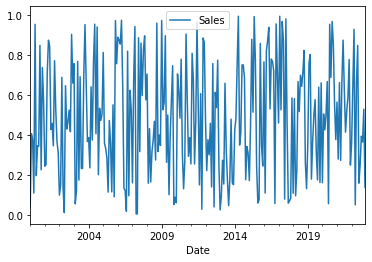

In [4]:
df.plot()

<AxesSubplot:xlabel='Date'>

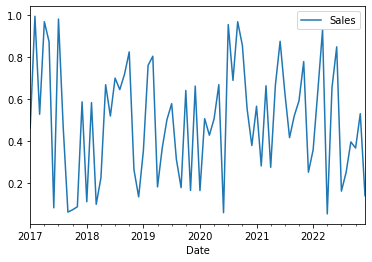

In [5]:
df.loc['2017-1-31':].plot()

In [6]:
from statsmodels.tsa.statespace.tools import diff 
diffdvds=diff(df, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
diffdvds

,Sales
Date,
2001-01-31,0.203081
2001-02-28,-0.155832
2001-03-31,0.336163
2001-04-30,0.765768
2001-05-31,-0.109874
...,...
2022-08-31,-0.165341
2022-09-30,-0.124764
2022-10-31,-0.225418


C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


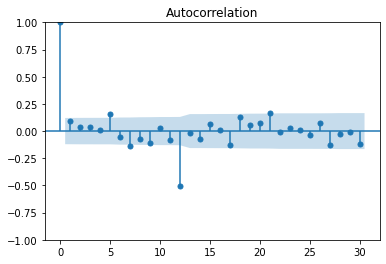

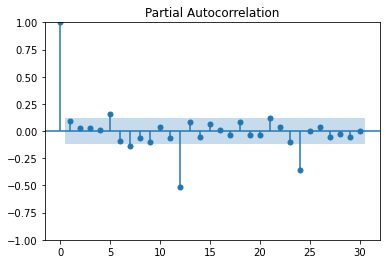

In [7]:
sm.graphics.tsa.plot_acf(diffdvds.values.squeeze(), lags=30) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(diffdvds.values.squeeze(), lags=30)
plt.show()

In [8]:
mod = sm.tsa.SARIMAX(df, order=(1,0,0),seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())

C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                  276
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -58.492
Date:                              Sat, 01 Apr 2023   AIC                            122.984
Time:                                      17:50:43   BIC                            133.712
Sample:                                  01-31-2000   HQIC                           127.295
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0767      0.061      1.259      0.208      -0.043       0.196
ma.S.L12      -0.95

In [9]:
print(res.forecast(12))

2023-01-31    0.375244
2023-02-28    0.460309
2023-03-31    0.594683
2023-04-30    0.445489
2023-05-31    0.565096
2023-06-30    0.507446
2023-07-31    0.482161
2023-08-31    0.390941
2023-09-30    0.562626
2023-10-31    0.476153
2023-11-30    0.521473
2023-12-31    0.413374
Freq: M, Name: predicted_mean, dtype: float64


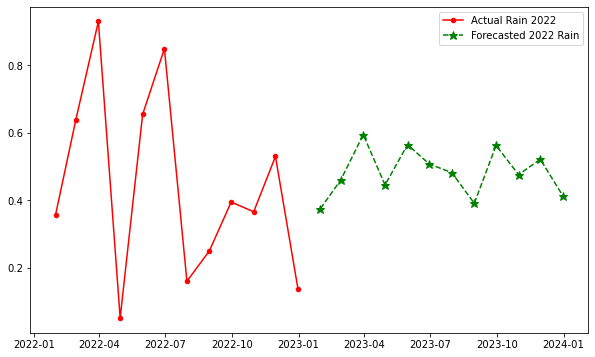

In [10]:
prediction2022 = res.forecast(12)
plt.figure(figsize=(10,6))
plt.plot(df.loc['2022-1-31':'2022-12-31'],ls='-',marker='.',color='r',markersize=9,label='Actual Rain 2022')
plt.plot(prediction2022,ls='--',marker='*',color='g',markersize=9,label='Forecasted 2022 Rain')
plt.legend(loc='best')

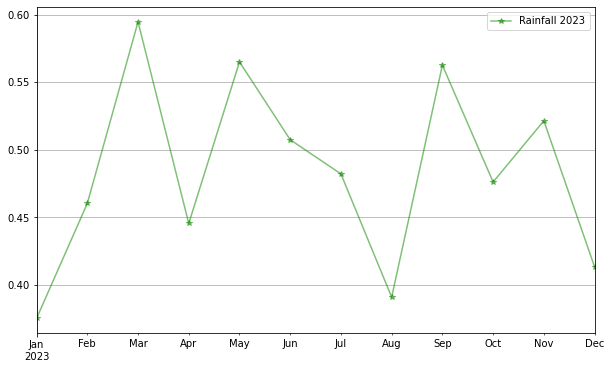

In [11]:
prediction = res.forecast(12)
prediction.plot(figsize=(10,6),label='Rainfall 2023',color='#1808',grid=True,marker='*')
plt.legend(loc='best')

In [12]:
up = pd.concat([df,prediction],axis=0)
up.shape

(288, 2)

                Rain
Year                
2023-01-31  0.375244
2023-02-28  0.460309
2023-03-31  0.594683
2023-04-30  0.445489
2023-05-31  0.565096
2023-06-30  0.507446
2023-07-31  0.482161
2023-08-31  0.390941
2023-09-30  0.562626
2023-10-31  0.476153
2023-11-30  0.521473
2023-12-31  0.413374
Year
2023-01-31    0.375244
2023-02-28    0.460309
2023-03-31    0.594683
2023-04-30    0.445489
2023-05-31    0.565096
2023-06-30    0.507446
2023-07-31    0.482161
2023-08-31    0.390941
2023-09-30    0.562626
2023-10-31    0.476153
2023-11-30    0.521473
2023-12-31    0.413374
Freq: M, Name: predicted_mean, dtype: float64


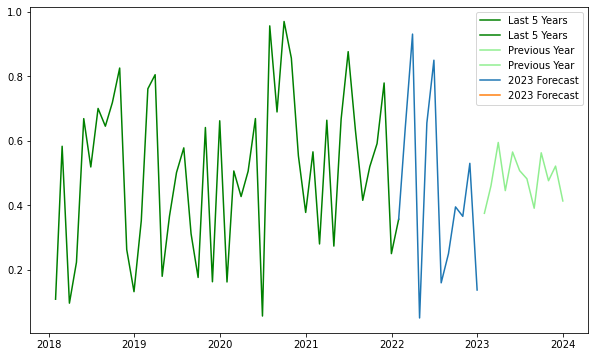

In [13]:
predictions = pd.DataFrame(prediction)
predictions.columns = ['Rain']
predictions.index.name = 'Year'
print(predictions)
frames =[df,predictions]

result =pd.concat(frames)
result


plt.figure(figsize=(10,6))
plt.plot(result.loc['2018-01-01':'2022-1-31'],color='g', label='Last 5 Years')
plt.plot(result.loc['2022-12-31':'2023-12-31'],color='lightgreen',label= 'Previous Year')
plt.plot(result.loc['2022-1-31':'2022-12-31'],label='2023 Forecast')
plt.legend(loc='best')
print(prediction)

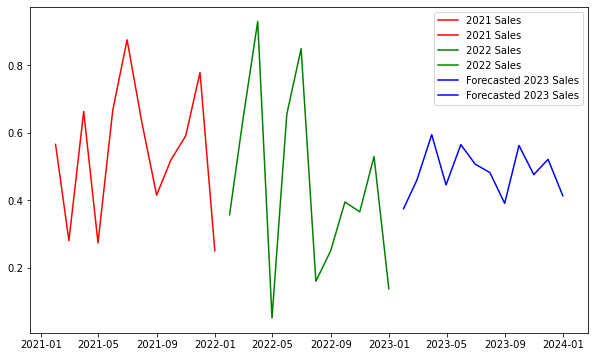

In [14]:
plt.figure(figsize=(10,6))
plt.grid=True
plt.plot(result.loc['2021-1-31':'2021-12-31'],color='r',label='2021 Sales')
plt.plot(result.loc['2022-1-31':'2022-12-31'],color='g',label='2022 Sales')
plt.plot(result.loc['2023-1-31':'2023-12-31'],color='b',label='Forecasted 2023 Sales')
plt.legend(loc='best')

In [15]:
df[pd.DatetimeIndex(df.index).month==7]
df[pd.DatetimeIndex(df.index).year == 2002]
df[ (pd.DatetimeIndex(df.index).month==7) & (pd.DatetimeIndex(df.index).year ==2002)]

,Sales
Date,
2002-07-31,0.430634


In [16]:
df    [
    (pd.DatetimeIndex(df.index).year ==2022)
    &
     ((pd.DatetimeIndex(df.index).day ==30))
    ]

,Sales
Date,
2022-04-30,0.050934
2022-06-30,0.849525
2022-09-30,0.395047
2022-11-30,0.530042


<AxesSubplot:xlabel='Date'>

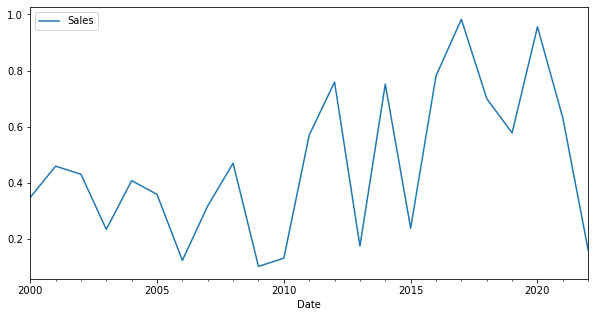

In [17]:
df[ (pd.DatetimeIndex(df.index).month==7)]
df[ (pd.DatetimeIndex(df.index).month==7)].plot(figsize=(10,5) )

In [18]:
df    [
    (pd.DatetimeIndex(df.index).year ==2022)
    &
     ((pd.DatetimeIndex(df.index).day ==30))
    ]

,Sales
Date,
2022-04-30,0.050934
2022-06-30,0.849525
2022-09-30,0.395047
2022-11-30,0.530042


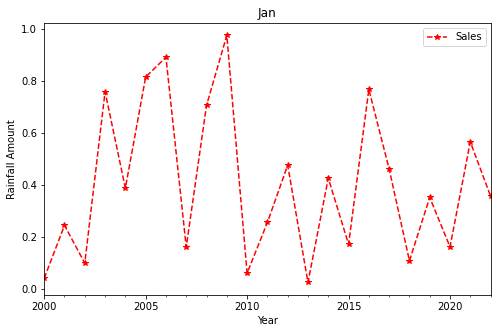

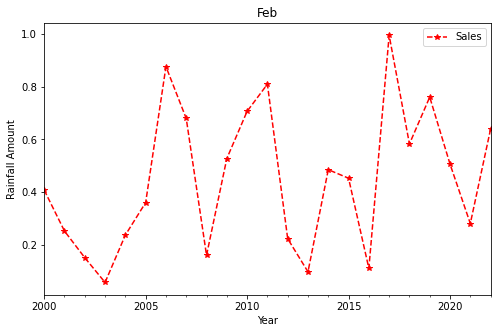

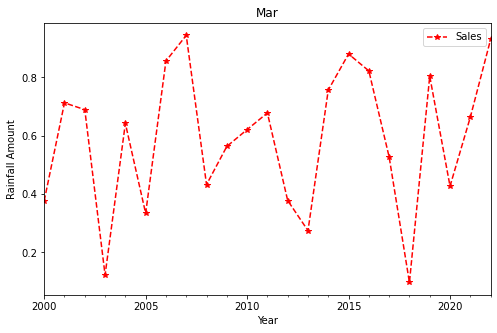

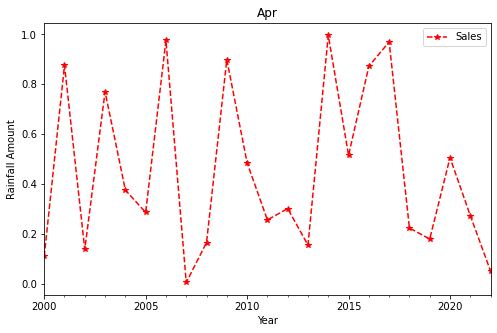

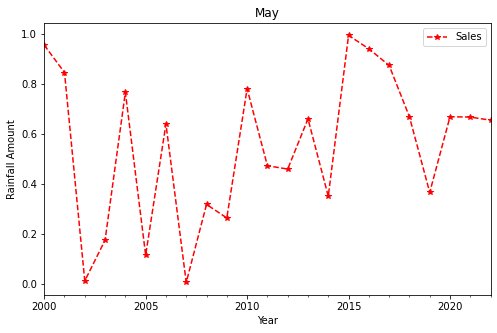

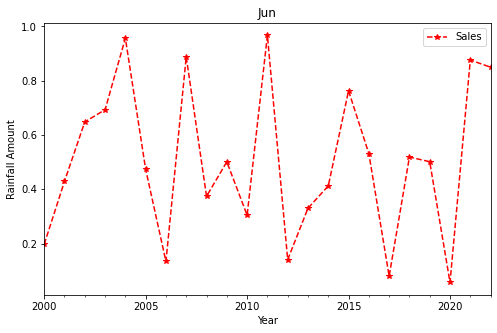

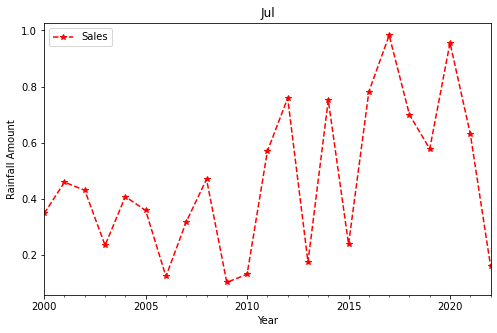

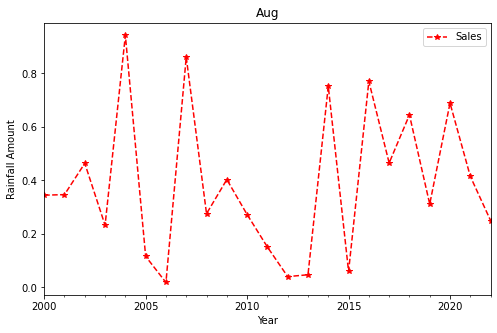

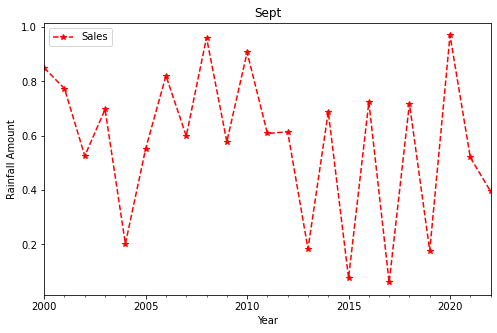

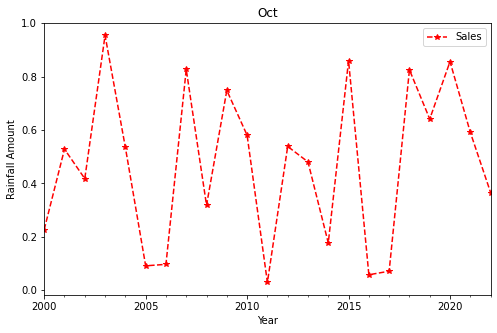

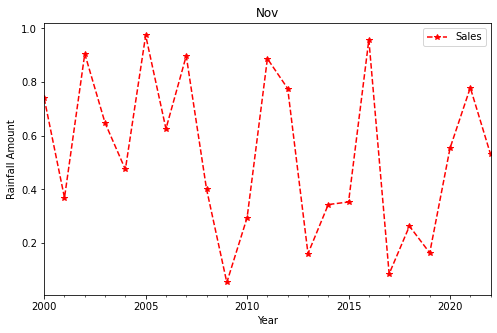

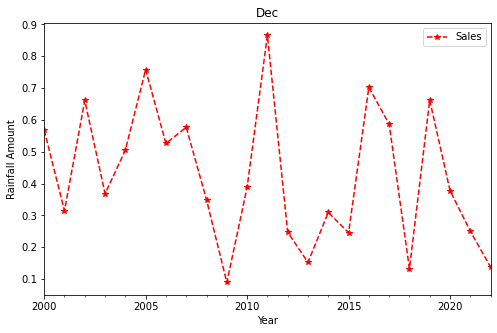

In [19]:
k = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
for key,value in k.items():
    df[pd.DatetimeIndex(df.index).month==key].plot(title=value,color='r',
                                                       xlabel='Year',
                                                       ylabel='Rainfall Amount',
                                                       figsize=(8,5),
                                                       marker = '*',
                                                       ls='--'
                                                      )

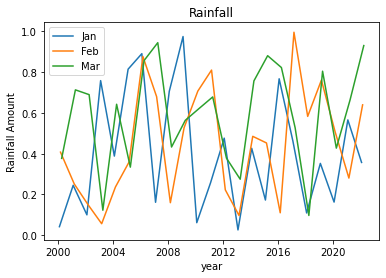

In [20]:
k = {1:'Jan',2:'Feb',3:'Mar'}
for key, value in k.items():
    plt.plot(df[(pd.DatetimeIndex(df.index).month==key)],label= value)
    plt.title('Rainfall')
    plt.xlabel('year')
    plt.ylabel('Rainfall Amount')
    plt.legend(loc='best')  

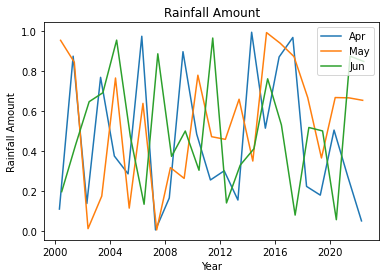

In [21]:
k = {4:'Apr',5:'May',6:'Jun'}
for key, value in k.items():
    plt.plot(df[(pd.DatetimeIndex(df.index).month==key)],label= value)
    plt.title('Rainfall Amount')
    plt.xlabel('Year')
    plt.ylabel('Rainfall Amount')
    plt.figure=figsize=(10,5)
    plt.legend(loc='best')  